In [17]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [53]:
path = 'Data/angels_survey.csv'
answers_df = pd.read_csv(path)

display(answers_df)

,timestamp,day_born,olympic_sport,fight_or_flight,love_touch,love_words,love_service,love_time,love_gifts,height
0,10/17/2024 12:51:34,12/28/2001,Badminton,Run,3,3,4,5,3,168
1,10/17/2024 12:51:50,10/5/1998,Archery,Freeze,4,5,3,4,2,176
2,10/17/2024 12:52:12,6/9/2003,Skateboarding,Run,4,3,5,5,2,183
3,10/17/2024 12:52:19,5/2/1998,Swimming,Freeze,5,4,4,4,2,171
4,10/17/2024 12:57:47,1/9/2001,Tennis,Run,4,1,3,5,4,163
5,10/17/2024 13:05:06,6/7/2002,Badminton,Fight,2,4,4,4,5,163
6,10/17/2024 13:08:45,3/6/2000,Sailing,Run,4,5,4,5,4,170
7,10/17/2024 13:20:22,5/4/1997,Diving,Run,2,5,5,4,4,168
8,10/17/2024 13:28:11,1/25/1999,Gymnastics,Run,3,4,5,4,1,178
9,10/17/2024 13:30:21,7/11/1998,Volleyball,Run,4,3,4,4,3,180


In [55]:
answers_df['fight_or_flight']=='Run'

0      True
1     False
2      True
3     False
4      True
5     False
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14    False
15     True
16     True
Name: fight_or_flight, dtype: bool

In [19]:
answers_df.fight_or_flight

runners_list = answers_df[[runner for runner in answers_df.fight_or_flight == 'Run']]
# print(runners_list)
runners_love_time = runners_list['love_time'].tolist()
runners_love_gifts = runners_list['love_gifts'].tolist()
runners_height = runners_list['height'].tolist()
print('Runners Loving Quality Time:', runners_love_time)
print('Runners Loving Gifts:', runners_love_gifts)
print('Runners Heights:', runners_height)

Runners Loving Quality Time: [5, 5, 5, 5, 4, 4, 4, 2, 4, 5, 1, 5, 4]
Runners Loving Gifts: [3, 2, 4, 4, 4, 1, 3, 5, 3, 2, 3, 2, 3]
Runners Heights: [168, 183, 163, 170, 168, 178, 180, 176, 165, 183, 168, 165, 165]


In [60]:
plt.style.use('_mpl-gallery')
x = np.arange(0,260,20)
y = np.vstack([runners_list['love_time'], runners_list['love_gifts'], runners_list['love_touch']])

# runners_love_time.dot(runners_height)

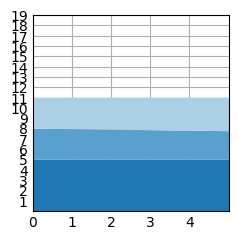

In [65]:
# plt.hist(answers_df.fight_or_flight, bins=17)
fig, ax = plt.subplots()
ax.stackplot(x, y)

ax.set(xlim=(0, 5), xticks=np.arange(0, 5),
       ylim=(0, 10), yticks=np.arange(1, 20))

plt.show()